# Lab 4: Asking a statistical question



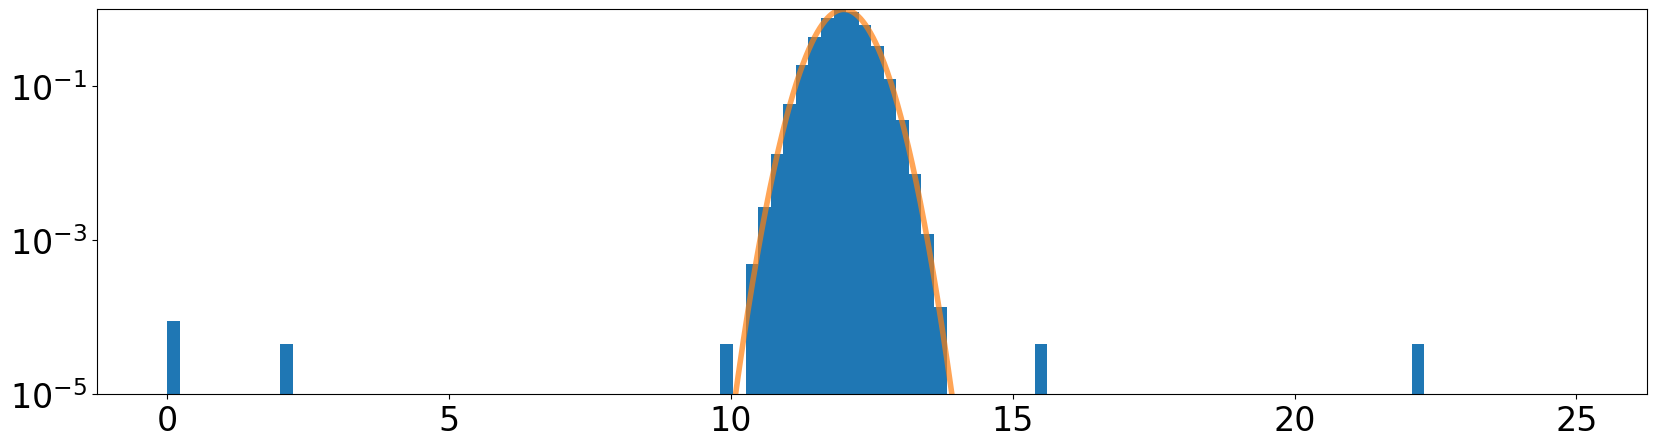

In [2]:


%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,5)

d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)

x = np.linspace(0, 25, 10000)
ax.plot(x, stats.norm.pdf(x, loc = 12., scale = 0.4), linewidth = 4, alpha = 0.7)
plt.ylim([1e-5,1])
plt.show()

A)  
- 1. Explore the data using relevant plots: The plot above shows the data overlayed with a gaussian distribution with a mean of 12 and a standard deviation of 0.4. This plot illustrates very clearly what the bad data is and what is the good data. The points that lie far to the sides of the gaussian distribution are very very unlikley to be real temperature readings i.e. they are the bad data.  

- 2. Given that that the background is given by a gaussian distribution of mean = 12 and sigma = 0.4, how many points from the above dataset are a greater than 4 sigma deviation from the mean? 

- This statistical question allows us to identify the bad data that is above or below some threshold of likelihood. Data that is too unlikely, given the background described above, is more likley to be false data than represent measurements from the true background distribution. 
    
- 3. For the points that lie above the mean, the probability the background gave data as far above or further above the mean is equal to $$ 1 - \int_{-inf}^{4}pdf(x)dx $$
    For data that lies below the mean, the probability that the background gave points as far below the mean or lower is equal to $$ \int_{-inf}^{-4}pdf(x)dx $$
    The above two integrals assume the PDF if that of a standard normal distribution.
    
    
- Our task is to identify the temperature that corresponds to 4 sigma above the mean, and 4 sigma below the mean and throw away all the data outside of those points. To do that we find the the probability that corresponds to 4 sigma, than equate that probability to some value on our background distribution to get a measurement value. Then search all our data for points above and below that and throw them away.

In [7]:
prob3 = stats.norm.sf(4, loc = 0, scale = 1)
measureA = stats.norm.isf(prob3, loc = 12, scale = 0.4) # Above the mean
measureB = stats.norm.ppf(prob3, loc = 12, scale = 0.4) # Below the mean

print("Those measuremnts that lie above", measureA, "and below", measureB, "Will be discarded for being bad data")

Those measuremnts that lie above 13.600000000000001 and below 10.399999999999999 Will be discarded for being bad data


In [8]:
print(d[np.where(d > measureA)])
print(d[np.where(d < measureB)])

[13.62683386 13.69034116 13.64863054 15.6        22.3       ]
[10.37972257 10.37018562 10.         10.3         2.1         0.
  0.        ]


The arrays above show the values that would be clipped from the distribution.  

|           | True T | False T |
|-----------|:--------:|:-------:|
| Test Good |  99,995      |      1   |
| Test Bad  | 5       |     7    |

- B. The number of omissions, where good data is gotten rid of, decreases as the statistical threshold increase and increases as the statistical     threshold decreases. For example, there is more deleted good data when the statistical threshold is 2 sigma and less deleted good data when the statistical threshold is 3 sigma. The amount of deleted data, corresponds to the amount of probability cut off: for sigma clipping with sigma = 3, approximately 0.3 percent of the data will be cut off since, outside of 3 sigma there lies 0.3 % of the data.

- C. Yes there are commissions: The bad data point of T = 12.7 was included in our data when sigma clipping using sigma = 4. This commission is avoidable by lowering the value of sigma inside which the data is acceptable. This is somewhat undesirable becasue lowering sigma increases the amount of good data that is cut off. This type of inclusion depends on the statistical threshold proportionally: Increasing sigma increases the amount of bad data that is included. 

# Problem 2

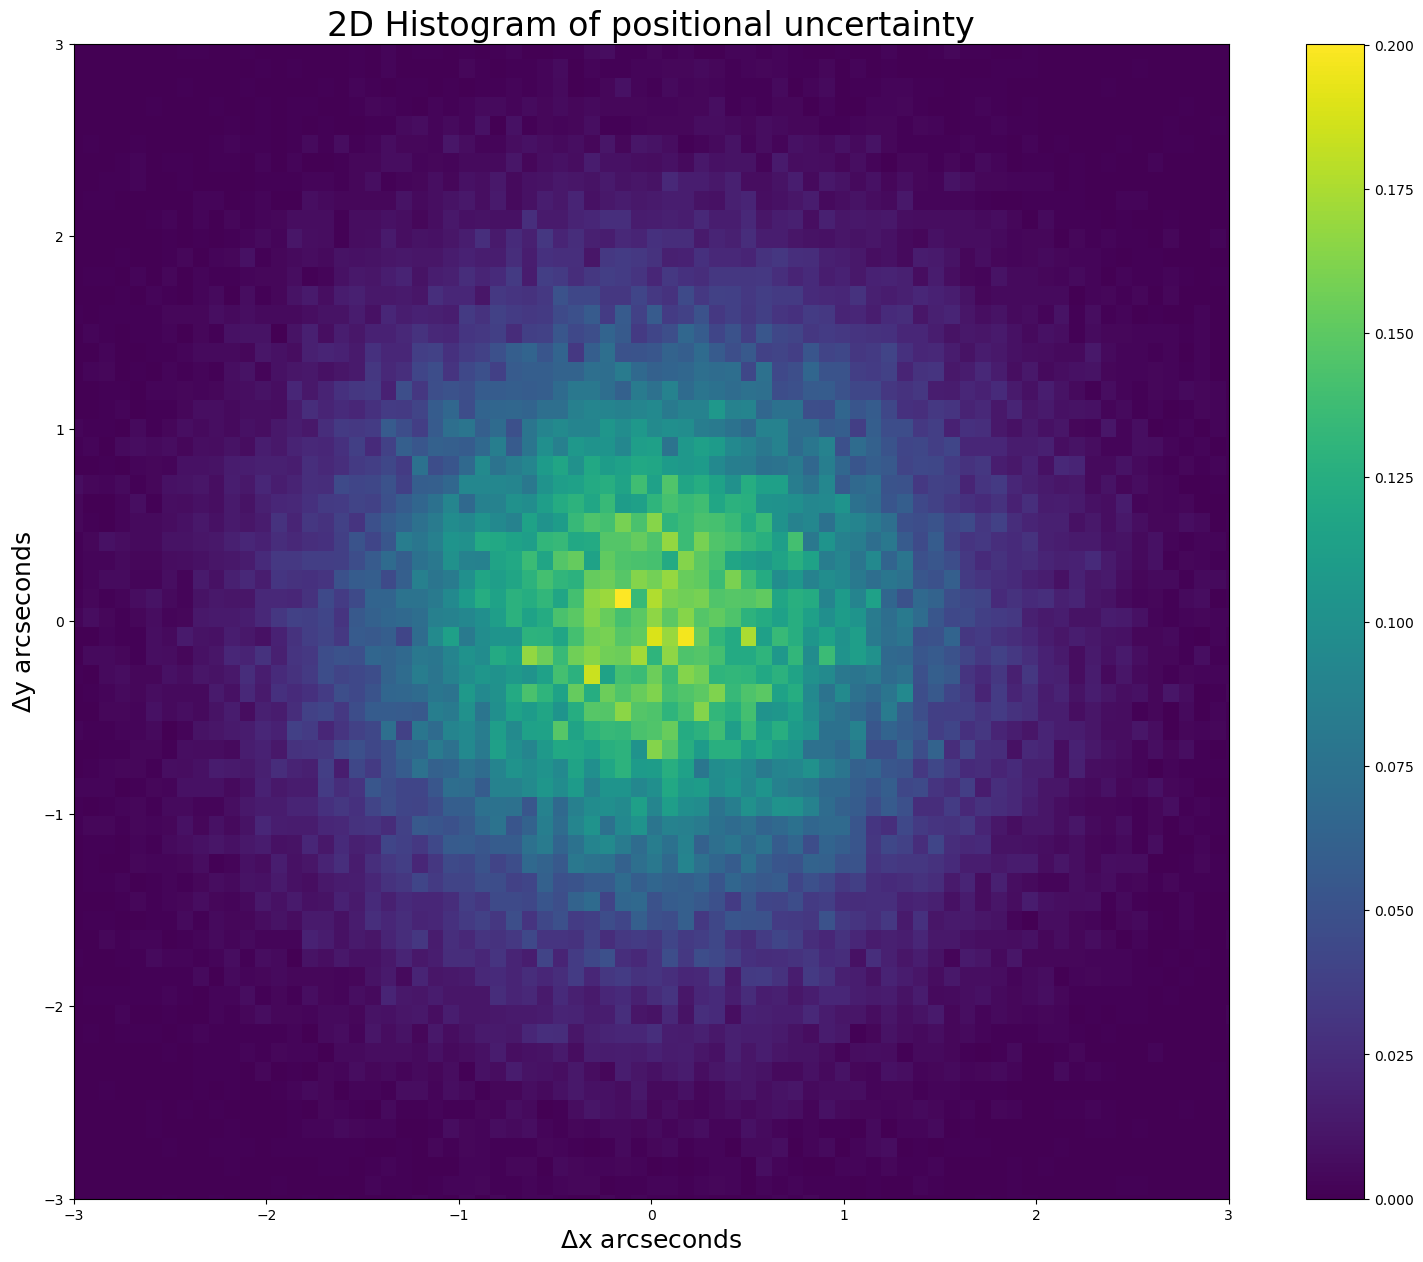

In [26]:
plt.rcParams["figure.figsize"] = (20,15)

a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)



1) Statistical Question: The magnitude of the motion of an individual object which is given by (delta x, delta y) is equal to the $\sqrt{ \Delta x^2 + \Delta y^2}$ where each component is distributed according to a gaussian distribution. The distribution of these magnitudes is given by a rayleigh distribution. 
    - Question: If the magnitude of the displacement of some object is distributed according to a rayleigh distribution, what magnitude displacement corresponds to a 5 sigma event?
    
2) This  distribution is given by the rayleigh distribution with sigma = 1. First we will find the probability that corresponds to 5 sigma event and use the isf function to find the measument value that corresponds to that probability

In [9]:
# Question 2 part 3
prob5 = stats.norm.sf(5, loc = 0, scale = 1)
measurement = stats.rayleigh.isf(prob5, scale = 1)
print("The measurement of the magnitude of the displacement that corresponds to a 5 sigma event is", measurement,"arc-seconds")

The measurement of the magnitude of the displacement that corresponds to a 5 sigma event is 5.489079776062419 arc-seconds


# Problem 3

1) Question: If we observe 6800 cosmic rays from a moon sized patch on the sky over the course of 15 days with knowledge that the patch is visible 8 hours per night and that the average number of cosmic rays per minute from that sized region is equal to one, what is it's significance?  

2) The background is the sum of the poisson distributions of 1 minute for 8 hours for 15 days. Since the sum of a poisson distribution is a poisson distribution, the new background is a poisson distribution of mean = 1 * 60 * 8 * 15 = 7200. Now that the new background is given, we need to calculate the significance of an observation of 6800 cosmic rays. To do this we integrate the poisson distribution of our background from 0 to 6800 which gives the probability of observing 6800 or fewer cosmic rays. To calculate the significance, we find the corresponding value of sigma for a normal distribtuoion 

In [41]:
prob = stats.poisson.cdf(6800, mu = 7200)
sig = stats.norm.isf(prob, loc = 0, scale =1)
print("The significance of an observation of 6800 cosmic rays is", sig)

The significance of an observation of 6800 cosmic rays is 4.750747965777188
